<h1> Assignment No : 5 </h1>

In [107]:
# Name: Shreya Dharmadhikari
# Class: TE 'A'
# Roll No: 31014
# Branch: Computer
# Problem Statement: Perform clustering of the iris dataset based on all variables using
#                    Gaussian mixture models. Use PCA to visualize clusters.

In [108]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

In [109]:
# get data and show some records
data = pd.read_csv(r"C:\Users\Suhas\Desktop\AI and ML\Iris_dataset.csv")
data.sample(5)

,sepal length,sepal width,petal length,petal width,class
108,6.7,2.5,5.8,1.8,Iris-virginica
20,5.4,3.4,1.7,0.2,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor


In [110]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     sepal length  sepal width  petal length  petal width
30            4.8          3.1           1.6          0.2
40            5.0          3.5           1.3          0.3
110           6.5          3.2           5.1          2.0
46            5.1          3.8           1.6          0.2
115           6.4          3.2           5.3          2.3
4          Iris-setosa
51     Iris-versicolor
105     Iris-virginica
24         Iris-setosa
0          Iris-setosa
Name: class, dtype: object


In [111]:
# see how many samples we have of each species 
data["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

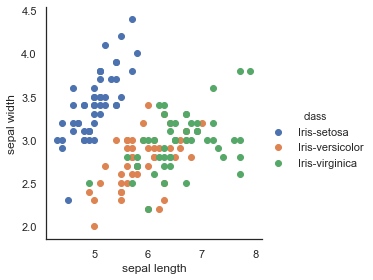

In [112]:
# use seaborn to make scatter plot showing species for each sample
sns.FacetGrid(data, hue="class", size=4) \
   .map(plt.scatter, "sepal length", "sepal width") \
   .add_legend();

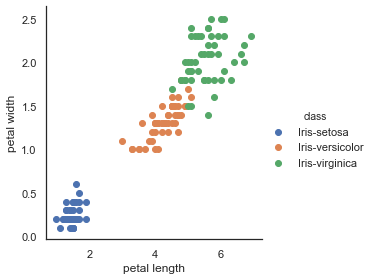

In [113]:
# do same for petals
sns.FacetGrid(data, hue="class", size=4) \
   .map(plt.scatter, "petal length", "petal width") \
   .add_legend();

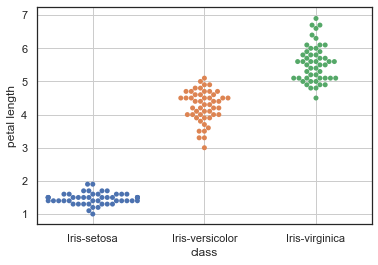

In [114]:
# show petal length distributions in a swarm plot - 

sns.swarmplot(x="class", y="petal length", data=data)
plt.grid()

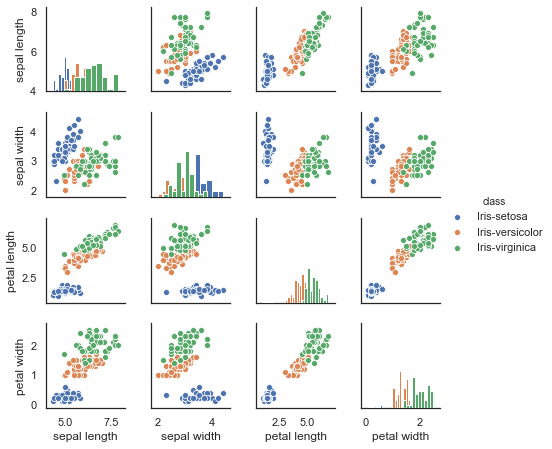

In [115]:
# note: the semicolon at the end just hides a line of text output.
sns.pairplot(data, hue="class", diag_kind="hist", size=1.6);

<h2>Feature Scaling</h2>

In [116]:
# the data is unbalanced (eg sepallength ~4x petalwidth), so should do feature scaling,
# otherwise the larger features will dominate the others in clustering, etc.

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,sepal length,sepal width,petal length,petal width
97,0.432165,-0.356361,0.307833,0.133226
49,-1.021849,0.569251,-1.341272,-1.312977
47,-1.506521,0.337848,-1.341272,-1.312977
66,-0.294842,-0.124958,0.421564,0.396172
75,0.916837,-0.124958,0.364699,0.264699


<h2> K-means Clustering </h2>

In [117]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [118]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.4589717867018717

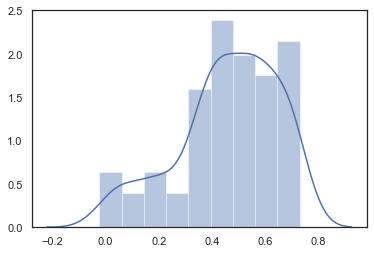

In [119]:
# so let's look at the distribution of silhouette scores...

scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

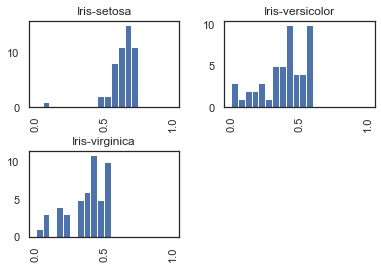

In [120]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['class'] = data['class']
df_scores.hist(by='class', column='SilhouetteScore', range=(0,1.0), bins=20);

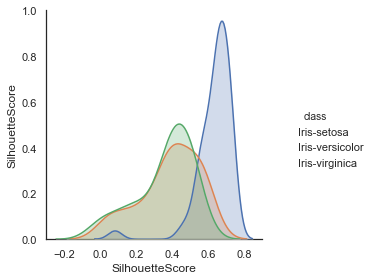

In [121]:
sns.pairplot(df_scores, hue="class", size=4);

<h2>Principal Component Analysis (PCA) </h2>

In [122]:
# mash the data down into 2 dimensions

from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
96,0.224357,-0.380485
130,2.435497,0.246654
88,0.067068,-0.212621
11,-2.327378,0.158587
86,1.049413,0.522197


In [123]:
data=data.replace({'Iris-setosa':0})
data=data.replace({'Iris-versicolor':1})
data=data.replace({'Iris-virginica':2})

In [124]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [125]:
# first, convert species to an arbitrary number
y_id_array=data['class']

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['SpeciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,SpeciesId
111,1.599065,-0.428249,2,2
72,1.227988,-0.940915,0,1
79,-0.047282,-1.057212,0,1
106,0.358374,-1.560095,0,2
44,-2.133373,1.171432,1,0


In [126]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

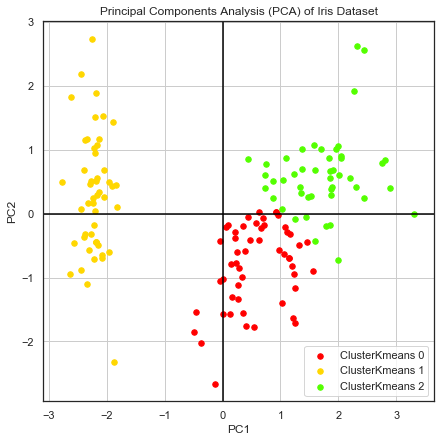

In [127]:
# plot the clusters each datapoint was assigned to
plotData(df_plot, 'ClusterKmeans')

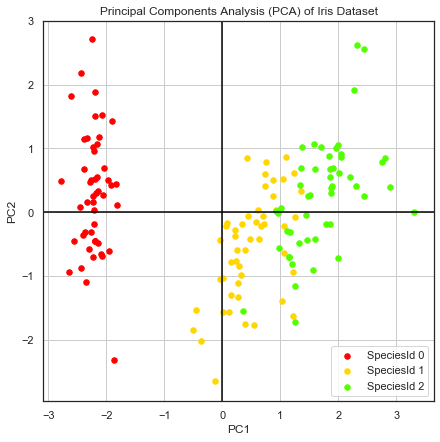

In [128]:
# so those are the *predicted* labels - what about the *actual* labels?
plotData(df_plot, 'SpeciesId')

<h2>Gaussian Mixture Model (GMM) Clustering</h2>

In [129]:
# and might be the case when measuring things like petal and sepal sizes...

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

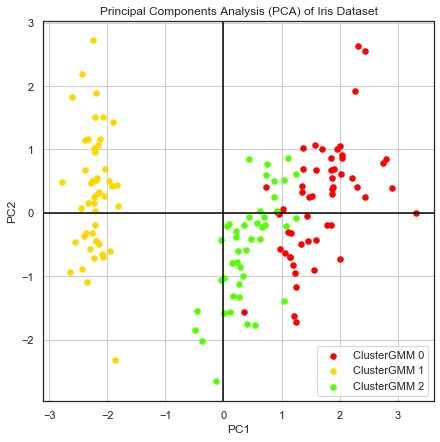

In [130]:
# add the GMM clusters to our data table and plot them
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [131]:
# the GMM did much better at finding the actual species clusters!  

# GMM tries to fit normally distributed clusters, which is probably the case with this data,
# so it fit it better. k-means is biased towards spherically distributed clusters.

In [132]:
from sklearn.metrics.cluster import adjusted_rand_score

# first let's see how the k-means clustering did - 
score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.6201351808870379

In [133]:
# now the GMM clustering - 
score = adjusted_rand_score(y, y_cluster_gmm)
score

0.9038742317748124

In [134]:
# so the GMM clustering matched the true labels more closely than the Kmeans, as expected from the plots.

In [135]:
# Conclusion
# Principal Component Analysis (PCA) is useful for visualizing high-dimensional datasets, as it can compress it down 
# to 2 dimensions. It's also useful for reducing the dimensionality of high-dimensional datasets, which require exponentially
# more data as the number of dimensions increase, but we didn't need to do that in this case because the dataset was rather 
# small.

# k-Means Clustering is biased towards spherical distributions of clusters, and makes hard assignments to clusters, 
# but is very fast (linear in number of features and data points).

# Gaussian Mixture Model (GMM) Clustering handles ellipsoidal distributions, and makes 'soft' assignments to clusters, 
# but is much slower than k-means for large datasets.

# For this dataset, which was measuring what were probably normally distributed features, the GMM clustering worked better 
# at finding the actual species labels, as measured by the adjusted Rand score.